In [56]:
from stobeLoader import load_data

In [57]:
dft_data_folder = "../../dft/polystyrene/packaged_output"

width1 = 0.6 / 2.355
width2 = 12 / 2.355
max_energy = 320

# load_data
data = load_data(
    directory=dft_data_folder,
    width1=width1,
    width2=width2,
    max_energy=max_energy,
    maxRot=4,
    verbose=True,
    n_jobs=1
)

if data is not None:
    # Access the different dataframes
    energy_results = data['energy_results']
    xray_transitions = data['xray_transitions']
    orbital_alpha = data['orbital_alpha']
    orbital_beta = data['orbital_beta']
    atomic_coordinates = data['atomic_coordinates']
    basis_sets = data['basis_sets']
else:
    print("Failed to load data")

Processing directory: ../../dft/polystyrene/packaged_output
Using maxRot = 4 for TDM tensor calculation
Total files to process: 15
Processing: 66.7% completed (10/15)
Available energy columns: ['Atom', 'EXC_Total energy (H)', 'EXC_Nuc-nuc energy (H)', 'EXC_El-nuc energy (H)', 'EXC_Kinetic energy (H)', 'EXC_Coulomb energy (H)', 'EXC_Ex-cor energy (H)', 'EXC_Originating File', 'TP_Total energy (H)', 'TP_Nuc-nuc energy (H)', 'TP_El-nuc energy (H)', 'TP_Kinetic energy (H)', 'TP_Coulomb energy (H)', 'TP_Ex-cor energy (H)', 'TP_Orbital energy core hole (H)', 'TP_Orbital energy core hole (eV)', 'TP_Rigid spectral shift (eV)', 'TP_Ionization potential (eV)', 'TP_LUMO_En', 'TP_Originating File', 'GND_Total energy (H)', 'GND_Nuc-nuc energy (H)', 'GND_El-nuc energy (H)', 'GND_Kinetic energy (H)', 'GND_Coulomb energy (H)', 'GND_Ex-cor energy (H)', 'GND_Originating File', 'Energy_Correction (eV)']
Applying Energy Corrections
Applied correction of -2.0247 eV to 327 transitions for atom C8
Applied co

In [58]:
xray_transitions.to_csv("xray_transitions.csv")
energy_results.to_csv("energy_results.csv")

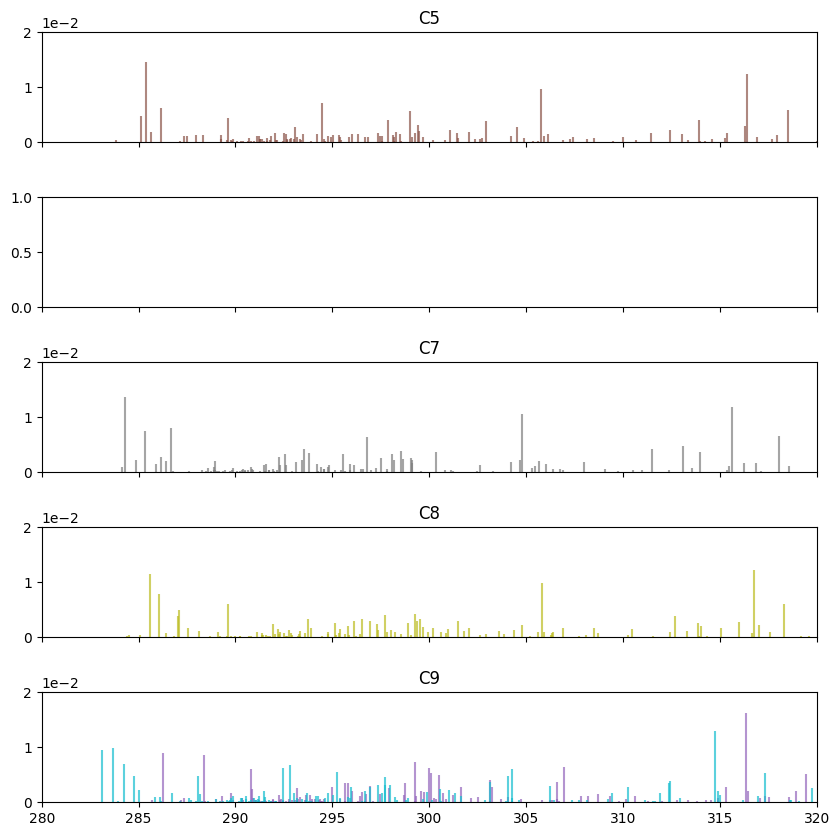

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, sharex=True, gridspec_kw={'hspace': 0.5}, figsize=(10, 10))
for _, row in xray_transitions.iterrows():
    # Grab only C4-9
    if int(row['Atom'].split("C")[1]) < 4 or int(row['Atom'].split("C")[1]) > 9:
        continue
    idx = int(row['Atom'].split("C")[1])-1 - 4
    ax[idx].vlines(row['E'], 0, row['OS'], color=row['Atom'], alpha=0.7)
    ax[idx].set_xlim(280, 320)
    ax[idx].set_ylim(0, 0.02)
    ax[idx].set_title(f"{row['Atom']}")
    # Use scientific notation for the y-axis
    ax[idx].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


In [60]:
from nexafs_analyzer import NEXAFSAnalyzer

data_path = "xray_transitions.csv"
df_step_path = "dft_step_data.csv"

analyzer = NEXAFSAnalyzer(data_path)
clustering = analyzer.run_complete_analysis(
    os_threshold_percent=1,
    overlap_threshold=55,
    compound_dict={'C':10, "H": 7, "Cl":1},
    dft_step_data_path=df_step_path
)

STEP 1: PREPROCESSING
Original data: 1635 transitions
After energy filter (E <= 320): 865 transitions
After 1% OS threshold: 584 transitions

STEP 2: ITERATIVE CLUSTERING ANALYSIS
Starting iterative analysis with 584 initial peaks
Overlap threshold: 55%
Method: skip_tolerant

Iteration 1:
Input peaks: 584
Calculating overlap matrix for 584 peaks...
Overlap matrix calculated: (584, 584)
Maximum off-diagonal overlap: 100.0%
Clustering 584 peaks with skip_tolerant method...
Overlap threshold: 55%
Skip tolerance: 1 peaks
Created 26 clusters
Cluster sizes: min=1, max=79, avg=22.5
Found tensor component columns: ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz']
Fitting Gaussians for 26 clusters...
Successfully fitted 26 out of 26 clusters
Aggregated tensor components: ['xx', 'xy', 'xz', 'yx', 'yy', 'yz', 'zx', 'zy', 'zz']
  xx: 920.107857 → 920.107857 (conservation check)
  xy: -12.490452 → -12.490452 (conservation check)
  xz: 0.000000 → 0.000000 (conservation check)
  yx: -12.490452 →

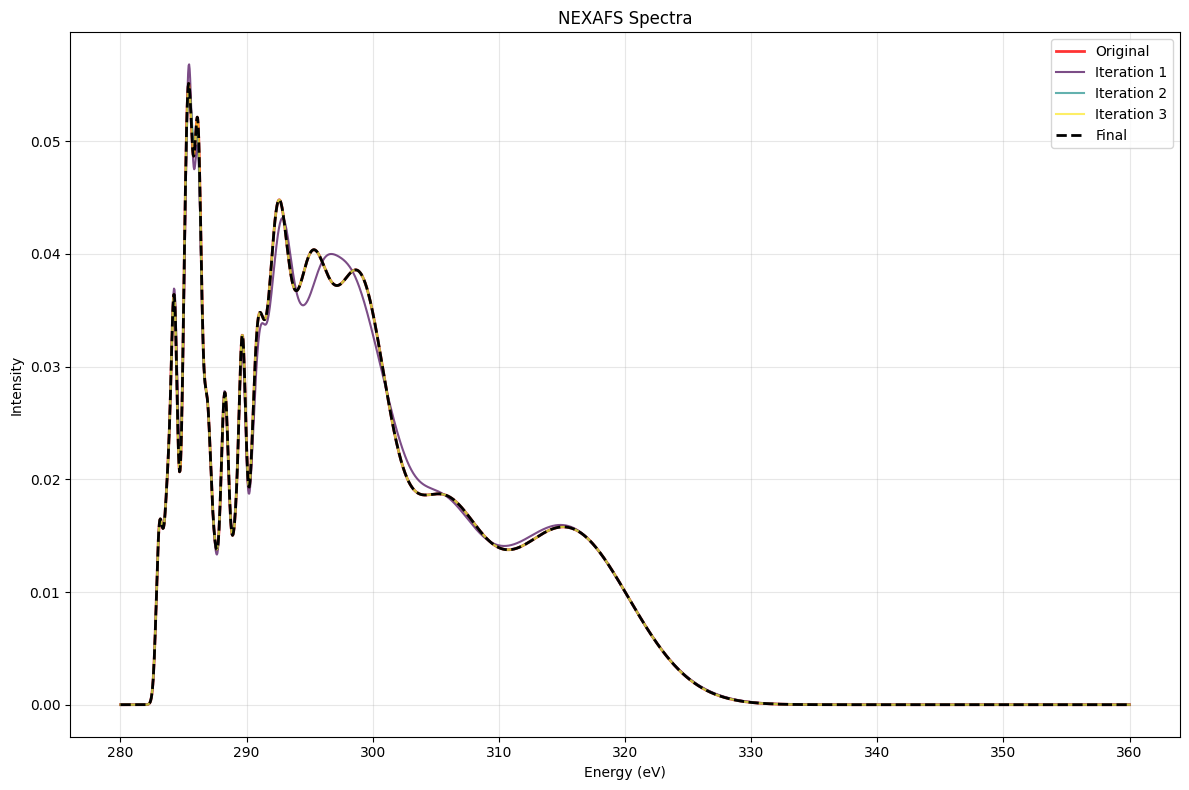

In [61]:
from plotUtils import plot_iteration_nexafs

plot_iteration_nexafs(clustering, 'all')

In [62]:
def display_leaf_values(d, path=None):
    """
    Recursively display the path and value for each non-dictionary leaf node in a nested dictionary.
    Prints: path: value
    """
    if path is None:
        path = []
    if isinstance(d, dict):
        for k, v in d.items():
            display_leaf_values(v, path + [str(k)])
    else:
        print(" -> ".join(path) + ":")
        display(d)

display_leaf_values(clustering)

preprocessing -> df_raw:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,Applied_Correction,xx,xy,xz,yx,yy,yz,zx,zy,zz
0,0,C8,C8tp.out,1.0,284.391169,0.000196,-0.000865,-0.005209,-0.000000,0.0000,...,-2.024731,0.107342,0.646410,0.0,0.646410,3.892658,0.0,0.0,0.0,0.0
1,1,C8,C8tp.out,2.0,284.524869,0.000414,-0.000000,-0.000000,0.007681,0.0000,...,-2.024731,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
2,2,C8,C8tp.out,3.0,285.047069,0.000391,0.000712,0.007418,0.000000,0.0001,...,-2.024731,0.036514,0.380426,0.0,0.380426,3.963486,0.0,0.0,0.0,0.0
3,3,C8,C8tp.out,4.0,285.592169,0.011578,0.000000,0.000000,0.040536,0.0000,...,-2.024731,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
4,4,C8,C8tp.out,5.0,286.034269,0.007931,-0.027309,-0.019443,0.000000,0.0019,...,-2.024731,2.654471,1.889886,0.0,1.889886,1.345529,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1630,C7,C7tp.out,323.0,1165.610222,0.045362,0.039801,-0.000855,0.000000,0.0000,...,-2.683578,3.998155,-0.085888,0.0,-0.085888,0.001845,0.0,0.0,0.0,0.0
1631,1631,C7,C7tp.out,324.0,1165.718822,0.045302,-0.000000,-0.000000,0.039782,0.0000,...,-2.683578,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1632,1632,C7,C7tp.out,325.0,1166.901922,0.045191,0.000850,0.039704,0.000000,0.0000,...,-2.683578,0.001832,0.085594,0.0,0.085594,3.998168,0.0,0.0,0.0,0.0
1633,1633,C7,C7tp.out,326.0,1311.938922,0.000009,0.000014,0.000525,0.000000,0.0037,...,-2.683578,0.002842,0.106591,0.0,0.106591,3.997158,0.0,0.0,0.0,0.0


preprocessing -> df_after_energy:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,Applied_Correction,xx,xy,xz,yx,yy,yz,zx,zy,zz
0,0,C8,C8tp.out,1.0,284.391169,0.000196,-0.000865,-0.005209,-0.000000,0.0000,...,-2.024731,0.107342,0.646410,0.0,0.646410,3.892658,0.0,0.0,0.0,0.0
1,1,C8,C8tp.out,2.0,284.524869,0.000414,-0.000000,-0.000000,0.007681,0.0000,...,-2.024731,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
2,2,C8,C8tp.out,3.0,285.047069,0.000391,0.000712,0.007418,0.000000,0.0001,...,-2.024731,0.036514,0.380426,0.0,0.380426,3.963486,0.0,0.0,0.0,0.0
3,3,C8,C8tp.out,4.0,285.592169,0.011578,0.000000,0.000000,0.040536,0.0000,...,-2.024731,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
4,4,C8,C8tp.out,5.0,286.034269,0.007931,-0.027309,-0.019443,0.000000,0.0019,...,-2.024731,2.654471,1.889886,0.0,1.889886,1.345529,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1478,C7,C7tp.out,171.0,318.050522,0.006579,0.028921,0.000912,0.000000,0.0000,...,-2.683578,3.996026,0.126011,0.0,0.126011,0.003974,0.0,0.0,0.0,0.0
1479,1479,C7,C7tp.out,172.0,318.111822,0.000009,-0.000000,0.000000,-0.001065,0.0000,...,-2.683578,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0
1480,1480,C7,C7tp.out,173.0,318.556722,0.001079,0.000311,-0.011705,-0.000000,0.0003,...,-2.683578,0.002822,-0.106204,0.0,-0.106204,3.997178,0.0,0.0,0.0,0.0
1481,1481,C7,C7tp.out,174.0,319.632422,0.000001,-0.000000,0.000000,-0.000287,0.0000,...,-2.683578,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0


preprocessing -> df_with_normalized:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,xx,xy,xz,yx,yy,yz,zx,zy,zz,normalized_OS
0,0,C8,C8tp.out,1.0,284.391169,0.000196,-0.000865,-0.005209,-0.000000,0.0000,...,0.107342,0.646410,0.0,0.646410,3.892658,0.0,0.0,0.0,0.0,0.012009
1,1,C8,C8tp.out,2.0,284.524869,0.000414,-0.000000,-0.000000,0.007681,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.025366
2,2,C8,C8tp.out,3.0,285.047069,0.000391,0.000712,0.007418,0.000000,0.0001,...,0.036514,0.380426,0.0,0.380426,3.963486,0.0,0.0,0.0,0.0,0.023957
3,3,C8,C8tp.out,4.0,285.592169,0.011578,0.000000,0.000000,0.040536,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.709393
4,4,C8,C8tp.out,5.0,286.034269,0.007931,-0.027309,-0.019443,0.000000,0.0019,...,2.654471,1.889886,0.0,1.889886,1.345529,0.0,0.0,0.0,0.0,0.485938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1478,C7,C7tp.out,171.0,318.050522,0.006579,0.028921,0.000912,0.000000,0.0000,...,3.996026,0.126011,0.0,0.126011,0.003974,0.0,0.0,0.0,0.0,0.403100
1479,1479,C7,C7tp.out,172.0,318.111822,0.000009,-0.000000,0.000000,-0.001065,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.000551
1480,1480,C7,C7tp.out,173.0,318.556722,0.001079,0.000311,-0.011705,-0.000000,0.0003,...,0.002822,-0.106204,0.0,-0.106204,3.997178,0.0,0.0,0.0,0.0,0.066111
1481,1481,C7,C7tp.out,174.0,319.632422,0.000001,-0.000000,0.000000,-0.000287,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.000061


preprocessing -> df_filtered:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,xx,xy,xz,yx,yy,yz,zx,zy,zz,normalized_OS
0,654,C9,C9tp.out,1.0,283.087467,0.009504,0.030802,-0.020193,0.000000,0.0030,...,2.797638,-1.834059,0.0,-1.834059,1.202362,0.0,0.0,0.0,0.0,0.582317
1,655,C9,C9tp.out,2.0,283.684367,0.009824,0.000000,-0.000000,-0.037407,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.601924
2,981,C5,C5tp.out,1.0,283.830052,0.000478,-0.002674,0.007825,0.000000,0.0005,...,0.418262,-1.223970,0.0,-1.223970,3.581738,0.0,0.0,0.0,0.0,0.029287
3,656,C9,C9tp.out,3.0,283.933567,0.000194,-0.002956,-0.004345,0.000000,0.0002,...,1.265590,1.860280,0.0,1.860280,2.734410,0.0,0.0,0.0,0.0,0.011887
4,1308,C7,C7tp.out,1.0,284.150422,0.001030,0.003809,0.011490,-0.000000,0.0014,...,0.396059,1.194727,0.0,1.194727,3.603941,0.0,0.0,0.0,0.0,0.063109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,494,C4,C4tp.out,168.0,318.923961,0.001987,-0.001941,-0.015807,0.000000,0.0002,...,0.059417,0.483879,0.0,0.483879,3.940583,0.0,0.0,0.0,0.0,0.121745
580,828,C9,C9tp.out,175.0,319.099367,0.000198,-0.004272,0.002607,0.000000,0.0002,...,2.914584,-1.778633,0.0,-1.778633,1.085416,0.0,0.0,0.0,0.0,0.012132
581,171,C8,C8tp.out,172.0,319.211069,0.000257,0.004970,-0.002815,-0.000000,0.0000,...,3.028451,-1.715310,0.0,-1.715310,0.971549,0.0,0.0,0.0,0.0,0.015747
582,495,C4,C4tp.out,169.0,319.457661,0.005114,-0.008284,0.024143,-0.000000,0.0002,...,0.421327,-1.227922,0.0,-1.227922,3.578673,0.0,0.0,0.0,0.0,0.313339


preprocessing -> df_processed:


,Unnamed: 0,Atom,Originating File,Index,E,OS,osx,osy,osz,osc(r2),...,xx,xy,xz,yx,yy,yz,zx,zy,zz,normalized_OS
0,654,C9,C9tp.out,1.0,283.087467,0.009504,0.030802,-0.020193,0.000000,0.0030,...,2.797638,-1.834059,0.0,-1.834059,1.202362,0.0,0.0,0.0,0.0,0.582317
1,655,C9,C9tp.out,2.0,283.684367,0.009824,0.000000,-0.000000,-0.037407,0.0000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,0.601924
2,981,C5,C5tp.out,1.0,283.830052,0.000478,-0.002674,0.007825,0.000000,0.0005,...,0.418262,-1.223970,0.0,-1.223970,3.581738,0.0,0.0,0.0,0.0,0.029287
3,656,C9,C9tp.out,3.0,283.933567,0.000194,-0.002956,-0.004345,0.000000,0.0002,...,1.265590,1.860280,0.0,1.860280,2.734410,0.0,0.0,0.0,0.0,0.011887
4,1308,C7,C7tp.out,1.0,284.150422,0.001030,0.003809,0.011490,-0.000000,0.0014,...,0.396059,1.194727,0.0,1.194727,3.603941,0.0,0.0,0.0,0.0,0.063109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,494,C4,C4tp.out,168.0,318.923961,0.001987,-0.001941,-0.015807,0.000000,0.0002,...,0.059417,0.483879,0.0,0.483879,3.940583,0.0,0.0,0.0,0.0,0.121745
580,828,C9,C9tp.out,175.0,319.099367,0.000198,-0.004272,0.002607,0.000000,0.0002,...,2.914584,-1.778633,0.0,-1.778633,1.085416,0.0,0.0,0.0,0.0,0.012132
581,171,C8,C8tp.out,172.0,319.211069,0.000257,0.004970,-0.002815,-0.000000,0.0000,...,3.028451,-1.715310,0.0,-1.715310,0.971549,0.0,0.0,0.0,0.0,0.015747
582,495,C4,C4tp.out,169.0,319.457661,0.005114,-0.008284,0.024143,-0.000000,0.0002,...,0.421327,-1.227922,0.0,-1.227922,3.578673,0.0,0.0,0.0,0.0,0.313339


clustering -> iteration_results -> overlap_matrices:


[array([[100.        ,  24.54459218,  46.25207672, ...,   0.        ,
           0.        ,   0.        ],
        [ 24.54459218, 100.        ,  99.99997007, ...,   0.        ,
           0.        ,   0.        ],
        [ 46.25207672,  99.99997007, 100.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 100.        ,
          99.99995339,  99.99996119],
        [  0.        ,   0.        ,   0.        , ...,  99.99995339,
         100.        ,  99.99994429],
        [  0.        ,   0.        ,   0.        , ...,  99.99996119,
          99.99994429, 100.        ]], shape=(584, 584)),
 array([[1.00000000e+02, 2.60667828e+01, 3.16806168e+00, 1.08686431e-01,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.

clustering -> iteration_results -> cluster_infos:


[     Unnamed: 0 Atom Originating File  Index           E        OS       osx  \
 0           654   C9         C9tp.out    1.0  283.087467  0.009504  0.030802   
 1           655   C9         C9tp.out    2.0  283.684367  0.009824  0.000000   
 2           981   C5         C5tp.out    1.0  283.830052  0.000478 -0.002674   
 3           656   C9         C9tp.out    3.0  283.933567  0.000194 -0.002956   
 4          1308   C7         C7tp.out    1.0  284.150422  0.001030  0.003809   
 ..          ...  ...              ...    ...         ...       ...       ...   
 579         494   C4         C4tp.out  168.0  318.923961  0.001987 -0.001941   
 580         828   C9         C9tp.out  175.0  319.099367  0.000198 -0.004272   
 581         171   C8         C8tp.out  172.0  319.211069  0.000257  0.004970   
 582         495   C4         C4tp.out  169.0  319.457661  0.005114 -0.008284   
 583         830   C9         C9tp.out  177.0  319.752467  0.002509  0.013443   
 
           osy       osz  

clustering -> iteration_results -> cluster_gaussians:


[    cluster_id           E     width        OS  height_at_center  n_peaks  \
 0            0  283.087467  0.254777  0.009504          0.014882        1   
 1            1  283.716844  0.277868  0.011404          0.016373        4   
 2            2  284.266963  0.257770  0.021266          0.032913        4   
 3            3  284.842271  0.282242  0.009571          0.013528        4   
 4            4  285.329908  0.274960  0.026809          0.038898        3   
 5            5  285.656778  0.288904  0.017366          0.023981        7   
 6            6  286.167658  0.279759  0.028912          0.041229        6   
 7            7  286.873893  0.324903  0.020234          0.024845        8   
 8            8  287.502991  0.276702  0.006097          0.008790        7   
 9            9  288.233090  0.306908  0.019862          0.025818        9   
 10          10  288.653984  0.306738  0.002915          0.003792        7   
 11          11  289.090060  0.300925  0.008925          0.01183

clustering -> iteration_results -> iteration_summaries:


[{'iteration': 1,
  'input_peaks': 584,
  'output_peaks': 26,
  'n_clusters': 26,
  'max_overlap': np.float64(99.99997132579871),
  'converged': False},
 {'iteration': 2,
  'input_peaks': 26,
  'output_peaks': 17,
  'n_clusters': 17,
  'max_overlap': np.float64(99.89829906182614),
  'converged': False},
 {'iteration': 3,
  'input_peaks': 17,
  'output_peaks': 16,
  'n_clusters': 16,
  'max_overlap': np.float64(73.04002947200583),
  'converged': False},
 {'iteration': 4,
  'input_peaks': 16,
  'output_peaks': 16,
  'max_overlap': np.float64(52.57636269783657),
  'converged': True}]

clustering -> final_peaks:


,E,width,OS,xx,xy,xz,yx,yy,yz,zx,zy,zz,theta
0,283.087467,0.254777,0.009504,2.797638,-1.834059,0.0,-1.834059,1.202362,0.0,0.0,0.0,0.0,90.000000
1,283.716844,0.277868,0.011404,2.079910,1.831036,0.0,1.831036,9.920090,0.0,0.0,0.0,4.0,68.463764
2,284.266963,0.257770,0.021266,0.107342,0.646410,0.0,0.646410,3.892658,0.0,0.0,0.0,12.0,17.978842
3,285.381029,0.398315,0.054148,11.343777,-6.108456,0.0,-6.108456,28.656223,0.0,0.0,0.0,16.0,62.564066
4,286.167658,0.279759,0.028912,13.341122,2.445828,0.0,2.445828,6.658878,0.0,0.0,0.0,4.0,74.983097
5,286.873893,0.324903,0.020234,11.455863,2.487561,0.0,2.487561,12.544137,0.0,0.0,0.0,8.0,64.783286
6,287.502991,0.276702,0.006097,9.505447,0.662162,0.0,0.662162,14.494553,0.0,0.0,0.0,4.0,77.005407
7,288.272497,0.332288,0.022679,16.266588,0.422190,0.0,0.422190,15.733412,0.0,0.0,0.0,32.0,35.268138
8,289.090060,0.300925,0.008925,18.708385,3.165697,0.0,3.165697,5.291615,0.0,0.0,0.0,24.0,39.010855
9,289.667902,0.282620,0.020130,32.122453,3.322081,0.0,3.322081,35.877547,0.0,0.0,0.0,24.0,63.509487


clustering -> parameters -> overlap_threshold:


55

clustering -> parameters -> method:


'skip_tolerant'

clustering -> parameters -> n_skipped:


1

clustering -> parameters -> max_iterations:


10

spectra -> energy_axis:


array([280.        , 280.04002001, 280.08004002, ..., 359.91995998,
       359.95997999, 360.        ], shape=(2000,))

spectra -> intensity_original:


array([2.02626822e-13, 2.14500099e-13, 2.27055678e-13, ...,
       6.02419204e-20, 5.60598194e-20, 5.21646831e-20], shape=(2000,))

spectra -> intensity_final:


array([2.02626822e-13, 2.14500099e-13, 2.27055678e-13, ...,
       6.02419204e-20, 5.60598194e-20, 5.21646831e-20], shape=(2000,))

spectra -> iteration_spectra -> iteration_1:


array([1.07787516e-13, 1.14281430e-13, 1.21158507e-13, ...,
       4.49722581e-18, 4.21462737e-18, 3.94953548e-18], shape=(2000,))

spectra -> iteration_spectra -> iteration_2:


array([2.02626822e-13, 2.14500099e-13, 2.27055678e-13, ...,
       6.02419204e-20, 5.60598194e-20, 5.21646831e-20], shape=(2000,))

spectra -> iteration_spectra -> iteration_3:


array([2.02626822e-13, 2.14500099e-13, 2.27055678e-13, ...,
       6.02419204e-20, 5.60598194e-20, 5.21646831e-20], shape=(2000,))

spectra -> energy_range:


(280, 360)

spectra -> n_points:


2000

theoretical_absorption:


None

step_edge:


None

In [63]:
display(clustering["clustering"]["final_peaks"])

,E,width,OS,xx,xy,xz,yx,yy,yz,zx,zy,zz,theta
0,283.087467,0.254777,0.009504,2.797638,-1.834059,0.0,-1.834059,1.202362,0.0,0.0,0.0,0.0,90.000000
1,283.716844,0.277868,0.011404,2.079910,1.831036,0.0,1.831036,9.920090,0.0,0.0,0.0,4.0,68.463764
2,284.266963,0.257770,0.021266,0.107342,0.646410,0.0,0.646410,3.892658,0.0,0.0,0.0,12.0,17.978842
3,285.381029,0.398315,0.054148,11.343777,-6.108456,0.0,-6.108456,28.656223,0.0,0.0,0.0,16.0,62.564066
4,286.167658,0.279759,0.028912,13.341122,2.445828,0.0,2.445828,6.658878,0.0,0.0,0.0,4.0,74.983097
5,286.873893,0.324903,0.020234,11.455863,2.487561,0.0,2.487561,12.544137,0.0,0.0,0.0,8.0,64.783286
6,287.502991,0.276702,0.006097,9.505447,0.662162,0.0,0.662162,14.494553,0.0,0.0,0.0,4.0,77.005407
7,288.272497,0.332288,0.022679,16.266588,0.422190,0.0,0.422190,15.733412,0.0,0.0,0.0,32.0,35.268138
8,289.090060,0.300925,0.008925,18.708385,3.165697,0.0,3.165697,5.291615,0.0,0.0,0.0,24.0,39.010855
9,289.667902,0.282620,0.020130,32.122453,3.322081,0.0,3.322081,35.877547,0.0,0.0,0.0,24.0,63.509487


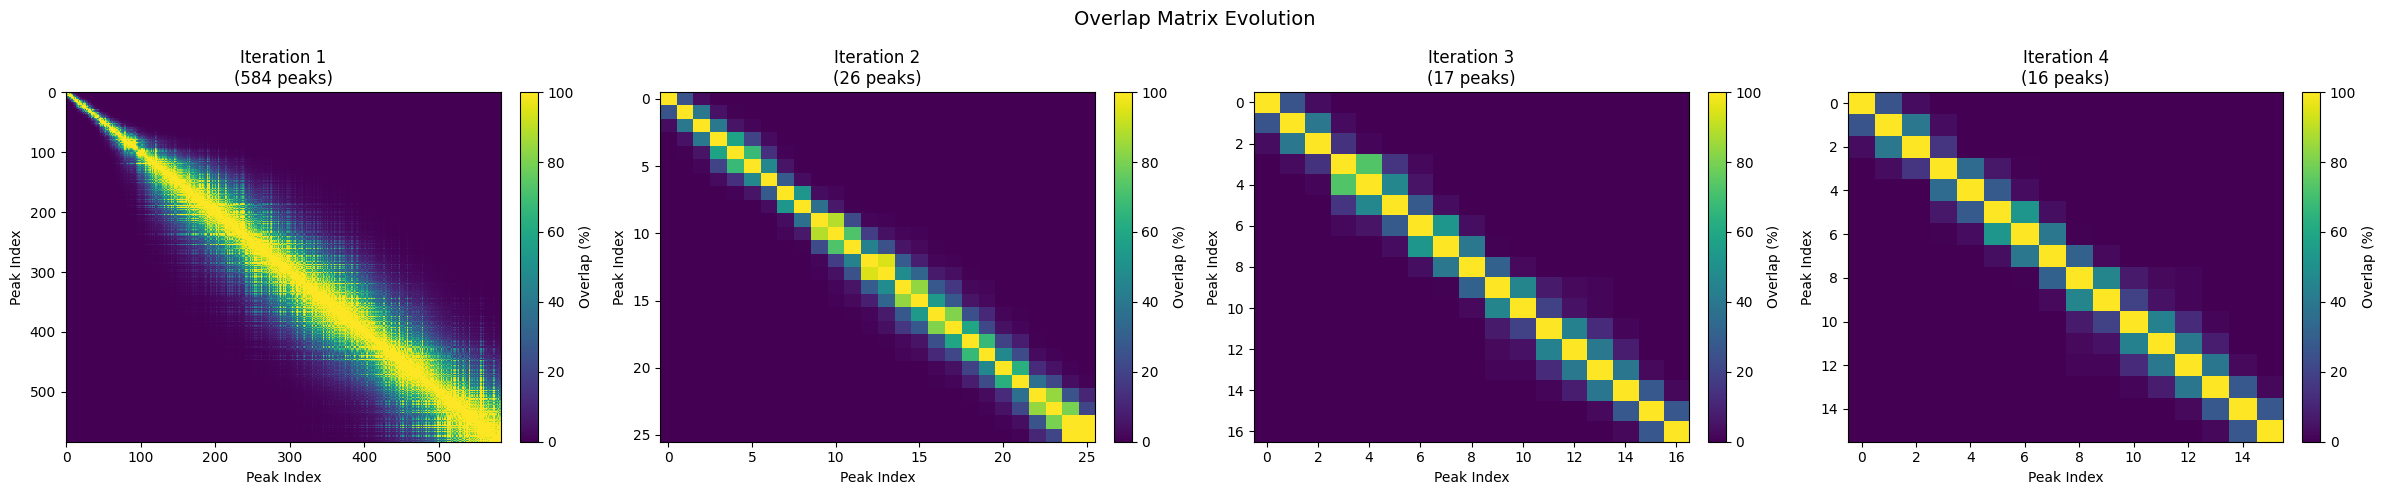

In [64]:
from plotUtils import plot_overlap_heatmaps

plot_overlap_heatmaps(clustering, 'all')

In [65]:
final = clustering["clustering"]["final_peaks"]
# Cut out E < 284
final = final[final['E'] > 284]

In [66]:
clustering["clustering"]["final_peaks"].to_csv("final_clusters.csv")